In [11]:
import torch
import random
import numpy as np

# fix seed for using the same initial weights
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
# torch.backends.cudnn.deterministic = True

# get datasets
import torchvision.datasets

In [18]:
numbers_train = torchvision.datasets.MNIST('./', download=True, train=True)
numbers_test = torchvision.datasets.MNIST('./', download=True, train=False)

# separate into features and predicted value

x_train = numbers_train.data      #train_data
y_train = numbers_train.targets   #train_labels

x_test = numbers_test.data
y_test = numbers_test.targets

# make train set useful
x_train = x_train.float()  # [60000, 28, 28]
x_test = x_test.float()

x_test = x_test.unsqueeze(1).float()
x_train = x_train.unsqueeze(1).float()

In [25]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        # make padding  = 2 for getting output as 28x28
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1 = torch.nn.ReLU() #Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2 = torch.nn.ReLU() #Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.fc1 = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3 = torch.nn.ReLU() #Tanh()

        self.fc2 = torch.nn.Linear(120, 84)
        self.act4 = torch.nn.ReLU() #Tanh()

        self.fc3 = torch.nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)

        return x

In [30]:
# settings for training
net = LeNet5()

# use cross-entropy like loss - function
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=5.0e-4)


# training will be batched
batch_size = 50

test_accuracy_history = []
test_loss_history = []

In [33]:
for epoch in range(20):
    order = np.random.permutation(len(x_train))
    for start_index in range(0, len(x_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index + batch_size]

        X_batch = x_train[batch_indexes]
        y_batch = y_train[batch_indexes]

        preds = net.forward(X_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    test_preds = net.forward(x_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)

    print(accuracy)

tensor(0.9886)
tensor(0.9903)
tensor(0.9900)
tensor(0.9889)
tensor(0.9906)
tensor(0.9895)
tensor(0.9904)
tensor(0.9924)
tensor(0.9913)
tensor(0.9905)
tensor(0.9916)
tensor(0.9917)
tensor(0.9855)
tensor(0.9912)
tensor(0.9913)
tensor(0.9908)
tensor(0.9908)
tensor(0.9916)
tensor(0.9908)
tensor(0.9921)


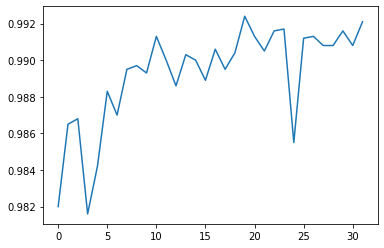

In [34]:
plt.plot(test_accuracy_history)
#plt.plot(test_loss_history)